In [1]:
%cd ..

/home/jupyter-tim/ba-tim


In [2]:
from drlqap.taskgenerators import generators, RandomWeightsTaskGenerator, RandomMatricesTaskGenerator, LinearTaskGenerator
from collections import defaultdict

In [3]:
# Generate new problems
sizes = [2,4,8,16,32,64,128,256]
count = 20
problems = {
    i: [RandomWeightsTaskGenerator(i).sample() for _ in range(count)] for i in sizes
}

In [4]:
# Clear results
results = {}

In [5]:
import scipy.optimize
from drlqap.simplesolver import solve_qap_backtracking, solve_qap_maxgreedy, solve_qap_faq, solve_random, solve_partial_random, solve_best_of_k
from drlqap.gurobi import solve_qap_gurobi
import numpy as np
from drlqap.qap import QAP
from drlqap.evaltools import load_checkpoints
from pathlib import Path
import random
import matplotlib.pyplot as plt
import time
import importlib
import torch

In [6]:
def evaluate(solver, problem, samples):
    if type(problem) == str:
        generator = generators[problem]
    else:
        generator = problem
    qaps = [generator.sample() for i in range(samples)]
    return evaluate_set(solver, qaps)
    
def evaluate_set(solver, problems):
    with torch.no_grad():
        start = time.perf_counter()
        values = []
        correct = 0
        for qap in problems:
            v_solver, assignment = solver(qap)
            v = qap.compute_value(assignment)
            if not np.isclose(v, v_solver):
                print (f"solver outputs incorrect value (got {v_solver}, actual {v})")
            values.append(v)
        end = time.perf_counter()
        mean = np.mean(values)
        variance = np.var(values)
        return mean, variance, (end - start) / len(problems)

In [7]:
def evaluate_full_and_store(solver_name, force=False):
    if solver_name not in results or force:
        solver = solvers[solver_name]
        means = []
        variances = []
        times = []
        for n in sizes:
            m, v, t = evaluate_set(solver, problems[n])
            means.append(m)
            variances.append(v)
            times.append(t)
            print(f"{solver_name} on n={n}: mean={m:.3f}, var={v:.3f}, t={t:.3f}")
        results[solver_name] = {
            "means": np.array(means),
            "vars": np.array(variances),
            "times": np.array(times)
        }

In [23]:
solvers = {
    'faq': solve_qap_faq,
    'a2c_md': load_checkpoints(Path('runs/a2c_ms100x_mediumrandoms/lr4e-5_s3'))[-1].solve,
    'random': solve_random,
    'max_greedy': solve_qap_maxgreedy,
    'dqn_sm': load_checkpoints(Path('runs/dqn_dense_ms_ec_eps0_smallrandoms/lr5e-4_s1'))[-1].solve,
    'dqn_md': load_checkpoints(Path('runs/dqn_dense_ms_ec_eps0_mediumrandoms/lr5e-4_s1'))[-1].solve,
    'rf': load_checkpoints(Path('runs/reinforce_ms100x_smallrandoms/lr1e-4_s4/'))[-1].solve,
    'last7opt': lambda qap: solve_partial_random(qap, 7),
    'last8opt': lambda qap: solve_partial_random(qap, 8),
    'rand1k': lambda qap: solve_best_of_k(qap, 1000, solve_random),
    'rand5k': lambda qap: solve_best_of_k(qap, 5000, solve_random),
    'rand10k': lambda qap: solve_best_of_k(qap, 10000, solve_random),
    'a2c_sm': load_checkpoints(Path('runs/a2c_ms100x_smallrandoms/lr4e-5_s2'))[-1].solve,
    'mcq_sm': load_checkpoints(Path('runs/mcq_eps0_smallrandoms/lr3e-4_s2'))[-1].solve,
}

runs/a2c_ms100x_mediumrandoms/lr4e-5_s3/checkpoint_0.pth
runs/a2c_ms100x_mediumrandoms/lr4e-5_s3/checkpoint_1000.pth
runs/a2c_ms100x_mediumrandoms/lr4e-5_s3/checkpoint_2000.pth
runs/a2c_ms100x_mediumrandoms/lr4e-5_s3/checkpoint_3000.pth
runs/a2c_ms100x_mediumrandoms/lr4e-5_s3/checkpoint_4000.pth
runs/a2c_ms100x_mediumrandoms/lr4e-5_s3/checkpoint_5000.pth
runs/a2c_ms100x_mediumrandoms/lr4e-5_s3/checkpoint_6000.pth
runs/a2c_ms100x_mediumrandoms/lr4e-5_s3/checkpoint_7000.pth
runs/a2c_ms100x_mediumrandoms/lr4e-5_s3/checkpoint_8000.pth
runs/a2c_ms100x_mediumrandoms/lr4e-5_s3/checkpoint_9000.pth
runs/a2c_ms100x_mediumrandoms/lr4e-5_s3/checkpoint_10000.pth
runs/a2c_ms100x_mediumrandoms/lr4e-5_s3/checkpoint_11000.pth
runs/a2c_ms100x_mediumrandoms/lr4e-5_s3/checkpoint_12000.pth
runs/a2c_ms100x_mediumrandoms/lr4e-5_s3/checkpoint_13000.pth
runs/a2c_ms100x_mediumrandoms/lr4e-5_s3/checkpoint_14000.pth
runs/a2c_ms100x_mediumrandoms/lr4e-5_s3/checkpoint_15000.pth
runs/a2c_ms100x_mediumrandoms/lr4e-5_

runs/mcq_eps0_smallrandoms/lr3e-4_s2/checkpoint_8000.pth
runs/mcq_eps0_smallrandoms/lr3e-4_s2/checkpoint_9000.pth
runs/mcq_eps0_smallrandoms/lr3e-4_s2/checkpoint_10000.pth
runs/mcq_eps0_smallrandoms/lr3e-4_s2/checkpoint_11000.pth
runs/mcq_eps0_smallrandoms/lr3e-4_s2/checkpoint_12000.pth
runs/mcq_eps0_smallrandoms/lr3e-4_s2/checkpoint_13000.pth
runs/mcq_eps0_smallrandoms/lr3e-4_s2/checkpoint_14000.pth
runs/mcq_eps0_smallrandoms/lr3e-4_s2/checkpoint_15000.pth
runs/mcq_eps0_smallrandoms/lr3e-4_s2/checkpoint_16000.pth
runs/mcq_eps0_smallrandoms/lr3e-4_s2/checkpoint_17000.pth
runs/mcq_eps0_smallrandoms/lr3e-4_s2/checkpoint_18000.pth
runs/mcq_eps0_smallrandoms/lr3e-4_s2/checkpoint_19000.pth
runs/mcq_eps0_smallrandoms/lr3e-4_s2/checkpoint_20000.pth
runs/mcq_eps0_smallrandoms/lr3e-4_s2/checkpoint_21000.pth
runs/mcq_eps0_smallrandoms/lr3e-4_s2/checkpoint_22000.pth
runs/mcq_eps0_smallrandoms/lr3e-4_s2/checkpoint_23000.pth
runs/mcq_eps0_smallrandoms/lr3e-4_s2/checkpoint_24000.pth
runs/mcq_eps0_sm

In [9]:
evaluate_full_and_store("random")

random on n=2: mean=0.536, var=0.273, t=0.000
random on n=4: mean=3.012, var=1.464, t=0.000
random on n=8: mean=14.500, var=5.037, t=0.000
random on n=16: mean=59.894, var=26.578, t=0.000
random on n=32: mean=245.235, var=99.301, t=0.000
random on n=64: mean=1008.389, var=365.995, t=0.003
random on n=128: mean=4064.551, var=1347.886, t=0.001
random on n=256: mean=16349.414, var=5933.042, t=0.001


In [10]:
evaluate_full_and_store("faq")

faq on n=2: mean=0.536, var=0.273, t=0.001
faq on n=4: mean=2.572, var=1.692, t=0.002
faq on n=8: mean=12.065, var=4.620, t=0.003
faq on n=16: mean=49.688, var=23.693, t=0.004
faq on n=32: mean=210.211, var=124.411, t=0.008
faq on n=64: mean=889.543, var=326.041, t=0.031
faq on n=128: mean=3679.150, var=963.445, t=0.135
faq on n=256: mean=15150.896, var=6019.247, t=0.524


In [11]:
evaluate_full_and_store("a2c_md")
evaluate_full_and_store("a2c_sm")
evaluate_full_and_store("rf")

a2c_md on n=2: mean=0.536, var=0.273, t=0.007
a2c_md on n=4: mean=2.520, var=1.780, t=0.011
a2c_md on n=8: mean=12.208, var=4.352, t=0.025
a2c_md on n=16: mean=52.576, var=23.675, t=0.057
a2c_md on n=32: mean=225.728, var=115.141, t=0.397
a2c_md on n=64: mean=965.812, var=375.201, t=0.628
a2c_md on n=128: mean=3997.009, var=2025.127, t=1.449
a2c_md on n=256: mean=16242.347, var=5997.001, t=7.739
a2c_sm on n=2: mean=0.536, var=0.273, t=0.004
a2c_sm on n=4: mean=2.424, var=1.671, t=0.011
a2c_sm on n=8: mean=12.070, var=4.758, t=0.025
a2c_sm on n=16: mean=53.490, var=20.794, t=0.059
a2c_sm on n=32: mean=228.647, var=135.031, t=0.362
a2c_sm on n=64: mean=968.876, var=363.573, t=0.610
a2c_sm on n=128: mean=3977.084, var=1613.342, t=1.434
a2c_sm on n=256: mean=16164.350, var=7279.446, t=7.758
rf on n=2: mean=0.536, var=0.273, t=0.005
rf on n=4: mean=2.633, var=1.792, t=0.012
rf on n=8: mean=13.082, var=4.125, t=0.027
rf on n=16: mean=55.296, var=25.488, t=0.060
rf on n=32: mean=236.657, var=

In [24]:
evaluate_full_and_store("mcq_sm")

mcq_sm on n=2: mean=0.536, var=0.273, t=0.008
mcq_sm on n=4: mean=2.465, var=1.745, t=0.011
mcq_sm on n=8: mean=12.217, var=3.889, t=0.024
mcq_sm on n=16: mean=53.816, var=20.507, t=0.055
mcq_sm on n=32: mean=235.344, var=139.756, t=0.133
mcq_sm on n=64: mean=978.019, var=327.626, t=0.351
mcq_sm on n=128: mean=3992.891, var=853.613, t=1.226
mcq_sm on n=256: mean=16173.154, var=4128.421, t=7.447


In [12]:
evaluate_full_and_store("last8opt")

last8opt on n=2: mean=0.536, var=0.273, t=0.000
last8opt on n=4: mean=2.366, var=1.654, t=0.002
last8opt on n=8: mean=11.373, var=3.826, t=3.392
last8opt on n=16: mean=54.098, var=22.549, t=3.386
last8opt on n=32: mean=237.520, var=120.567, t=3.382
last8opt on n=64: mean=995.548, var=249.499, t=3.433
last8opt on n=128: mean=4039.116, var=1130.007, t=3.454
last8opt on n=256: mean=16306.987, var=7822.518, t=3.550


[]

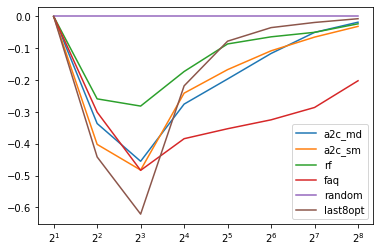

In [29]:
for s in ["a2c_md", "a2c_sm", "rf", "faq", "random", "last8opt"]:
    rm = results["random"]["means"]
    rv = results["random"]["vars"]
    plt.plot(sizes, (results[s]["means"] - rm) / rv, label=s)
plt.legend()
plt.semilogx(base=2)

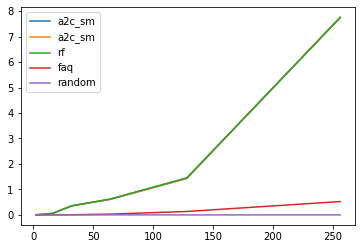

In [19]:
for s in ["a2c_sm", "a2c_sm", "rf", "faq", "random"]:
    plt.plot(sizes, results[s]["times"], label=s)
plt.legend()

In [20]:
results["rf"]["times"] / results["faq"]["times"]

array([ 5.49620557,  6.83723718,  8.51939748, 14.12378333, 44.39186938,
       20.26813869, 10.7770451 , 14.7763351 ])

In [21]:
results["rf"]["times"] / results["random"]["times"]

array([  15.10575442,   45.05193466,  109.77997091,  213.10385363,
       1250.00404767,  212.12879014, 2525.86246504, 8163.13250565])